<h1 align="center" class="jp-toc-ignore" style="color: LightSeaGreen">Coder Mê Tài Chính</h1>

---
<table width="100%" style="border:0px;">
    <tr style="font-size: 14pt">
        <td><b>Evangelist:</b> Lê Minh Đạt</td>
        <td><b>Email:</b> <a href="mailto:sirminhdat@gmail.com">sirminhdat@gmail.com</a></td>
        <td><b>Zalo:</b> 0919 564 515</td>
    </tr>
</table>

<center><h1 class="jp-toc-ignore"><b>Python For Finance (Py4Fin)</b></h1></center>

<center>
    <h2 style="margin-bottom:0px;" class="jp-toc-ignore">BÀI 6</h2>
    <h1 style="color: Crimson; margin-top:10px; margin-bottom:0px">Mô Hình Hồi Quy</h1>
    <h1 style="color: Crimson; margin-top:10px;">(Regression Model)</h1>
</center>

**Nội dung:**
1. Phân tích hồi quy là gì?
2. Cài đặt thư viện statsmodels và wooldridge
3. Mô hình hồi quy
    - Hồi quy đơn
    - Hồi quy bội
    - Cách viết hồi quy không dùng formula
4. Tiêu chí đánh giá Error cho mô hình    

---


<h2 style="color: blue">1. Phân tích hồi quy là gì?</h2>
Phân tích hồi quy là nghiên cứu sự phụ thuộc của một biến (biến phụ thuộc), vào một hay nhiều biến khác (biến độc lập), với ý tưởng là ước lượng (hay dự đoán) giá trị trung bình của biến phụ thuộc trên cơ sở các giá trị biết trước của các biến độc lập.

<h2 style="color: blue">2. Cài đặt thư viện statsmodels và wooldridge</h2>

**pip install statsmodels**

**pip install wooldridge**

wooldridge là thư viện đóng gói các bộ dữ liệu trong quyển sách "Introductory Econometrics: A Modern Approach" của tác giả Jeffrey M. Wooldridge

In [25]:
import statsmodels.formula.api as smf
import pandas as pd
import wooldridge as wdg 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', rc={"figure.figsize":(12, 8)})

<h2 style="color: blue">3. Mô hình hồi quy</h2>

<h3 style="color: blue">3.1. Hồi quy đơn</h3>
$$
\Large \hat{y}=\hat{\beta_0}+\hat{\beta_1}x
$$

- Biến phụ thuộc y chỉ phụ thuộc vào một biến độc lập x
- Lấy ví dụ: phân tích mối liên hệ giữa tiền lương (wage) với trình độ học vấn (educ). Sử dụng bộ dữ liệu WAGE1 của wooldridge
$$
\Large \hat{wage}=\hat{\beta_0}+\hat{\beta_1}educ
$$

In [26]:
wdg.data()

  J.M. Wooldridge (2016) Introductory Econometrics: A Modern Approach,
  Cengage Learning, 6th edition.

  401k       401ksubs    admnrev       affairs     airfare
  alcohol    apple       approval      athlet1     athlet2
  attend     audit       barium        beauty      benefits
  beveridge  big9salary  bwght         bwght2      campus
  card       catholic    cement        census2000  ceosal1
  ceosal2    charity     consump       corn        countymurders
  cps78_85   cps91       crime1        crime2      crime3
  crime4     discrim     driving       earns       econmath
  elem94_95  engin       expendshares  ezanders    ezunem
  fair       fertil1     fertil2       fertil3     fish
  fringe     gpa1        gpa2          gpa3        happiness
  hprice1    hprice2     hprice3       hseinv      htv
  infmrt     injury      intdef        intqrt      inven
  jtrain     jtrain2     jtrain3       kielmc      lawsch85
  loanapp    lowbrth     mathpnl       meap00_01   meap01
  meap93    

In [27]:
# Xem mô tả bộ dữ liệu wage1
wdg.data('wage1', description=True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

In [28]:
df = wdg.data('wage1')
df

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

In [30]:
df.isnull().sum()

wage        0
educ        0
exper       0
tenure      0
nonwhite    0
female      0
married     0
numdep      0
smsa        0
northcen    0
south       0
west        0
construc    0
ndurman     0
trcommpu    0
trade       0
services    0
profserv    0
profocc     0
clerocc     0
servocc     0
lwage       0
expersq     0
tenursq     0
dtype: int64

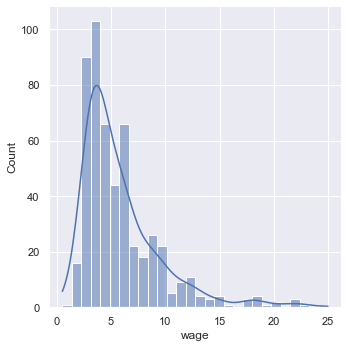

In [33]:
sns.displot(df['wage'], kde=True)
plt.show()

In [34]:
wage_df = df[["wage", "educ"]]
wage_df

,wage,educ
0,3.10,11
1,3.24,12
2,3.00,11
3,6.00,8
4,5.30,12
...,...,...
521,15.00,16
522,2.27,10
523,4.67,15
524,11.56,16


In [35]:
# Fitting
model1 = smf.ols(formula="wage ~ educ", data=wage_df) # OLS: Ordinary Least Squares
result1 = model1.fit()

In [36]:
# Xem kết quả tổng hợp
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           2.78e-22
Time:                        20:47:22   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.187      -2.250       0.441
educ           0.5414      0.053     10.167      0.000       0.437       0.646
==============================================================================
Omnibus:                      212.554   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              807.843
Skew:                           1.861   Prob(JB):                    3.79e-176
Kurtosis:                       7.797   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
result1.params

Intercept   -0.904852
educ         0.541359
dtype: float64

In [39]:
print(f"wage_hat = {result1.params['Intercept']:,.6f} + ({result1.params['educ']:,.6f})educ")

wage_hat = -0.904852 + (0.541359)educ


In [40]:
print(f"wage_hat = {result1.params[0]:,.6f} + ({result1.params[1]:,.6f})educ")

wage_hat = -0.904852 + (0.541359)educ


<h4 style="color: blue">3.1.1. Bảng kết quả hồi quy đơn</h4>

In [41]:
# Tạo DataFrame kết quả
df_result = pd.DataFrame({
    'wage': wage_df['wage'],
    'educ': wage_df['educ'],
    'wage_hat': result1.params['Intercept'] + result1.params['educ'] * wage_df['educ'],
    'wage_hat_fitted': result1.fittedvalues
})
df_result

,wage,educ,wage_hat,wage_hat_fitted
0,3.10,11,5.050100,5.050100
1,3.24,12,5.591459,5.591459
2,3.00,11,5.050100,5.050100
3,6.00,8,3.426022,3.426022
4,5.30,12,5.591459,5.591459
...,...,...,...,...
521,15.00,16,7.756896,7.756896
522,2.27,10,4.508741,4.508741
523,4.67,15,7.215537,7.215537
524,11.56,16,7.756896,7.756896


<h4 style="color: blue">3.1.2. Plot dữ liệu</h4>

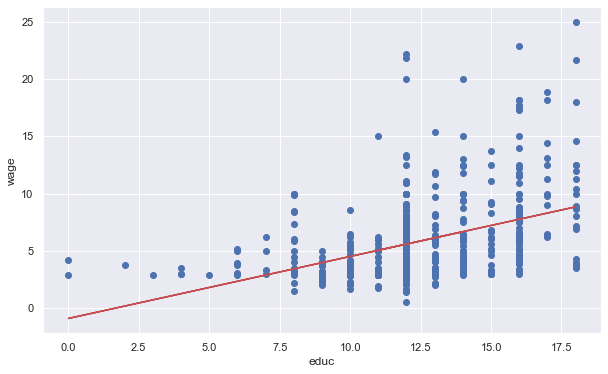

In [42]:
# Plot bằng tay
fig = plt.figure(figsize=(10,6))
plt.plot(wage_df['educ'], wage_df['wage'], marker='o', linestyle='')
# plt.scatter(x=wage_df['educ'], y=wage_df['wage'])
plt.plot(wage_df['educ'], result1.fittedvalues, color='r', linestyle='-')
plt.xlabel('educ')
plt.ylabel('wage')
plt.show()

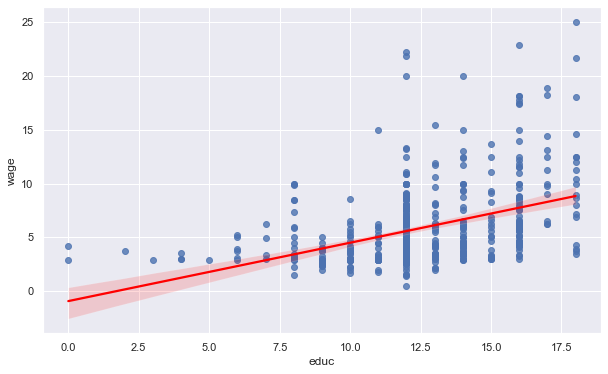

In [43]:
# Dùng hàm regplot của Seaborn
plt.figure(figsize=(10,6))
sns.regplot(x=wage_df['educ'], y=wage_df['wage'], line_kws={'color': 'red'})
plt.show()

<h3 style="color: blue">3.2. Hồi quy bội</h3>
$$
\Large \hat{y}=\hat{\beta_0}+\hat{\beta_1}x_1+\hat{\beta_2}x_2+...+\hat{\beta_k}x_k
$$

- Biến phụ thuộc y phụ thuộc vào nhiều biến độc lập x
- Lấy ví dụ: thêm 2 biến exper và tenure vào mô hình
$$
\Large \hat{wage}=\hat{\beta_0}+\hat{\beta_1}educ+\hat{\beta_2}exper + \hat{\beta_3}tenure
$$


In [44]:
wage_df2 = df[["wage", "educ", "exper", "tenure"]]

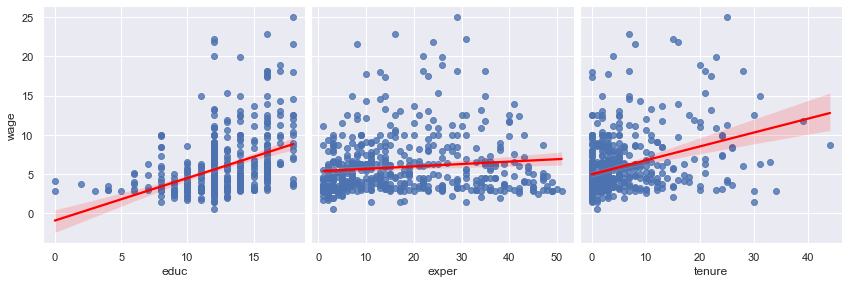

In [46]:
sns.pairplot(wage_df2, y_vars="wage", x_vars=["educ", "exper", "tenure"], height=4, kind="reg", plot_kws={'line_kws': {'color': 'red'}})
plt.show()

In [47]:
# Fitting
model2 = smf.ols(formula="wage ~ educ + exper + tenure", data=wage_df2) # OLS: Ordinary Least Squares
result2 = model2.fit()

In [48]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     76.87
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           3.41e-41
Time:                        21:07:06   Log-Likelihood:                -1336.8
No. Observations:                 526   AIC:                             2682.
Df Residuals:                     522   BIC:                             2699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8727      0.729     -3.941      0.000      -4.305      -1.441
educ           0.5990      0.051     11.679      0.000       0.498       0.700
exper          0.0223      0.012      1.853      0.064      -0.001       0.046
tenure         0.1693      0.022      7.820      0.000       0.127       0.212
==============================================================================
Omnibus:                      179.597   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.808
Skew:                           1.555   Prob(JB):                    4.77e-142
Kurtosis:                       7.475   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
result2.params

Intercept   -2.872735
educ         0.598965
exper        0.022340
tenure       0.169269
dtype: float64

In [51]:
print(f"wage_hat = {result2.params['Intercept']:,.6f} + ({result2.params['educ']:,.6f})educ + ({result2.params['exper']:,.6f})exper + ({result2.params['tenure']:,.6f})tenure")

wage_hat = -2.872735 + (0.598965)educ + (0.022340)exper + (0.169269)tenure


<h4 style="color: blue">3.2.1. Bảng kết quả hồi quy bội</h4>

In [52]:
# Tạo DataFrame kết quả
df_result2 = pd.DataFrame({
    'wage': wage_df2['wage'],
    'educ': wage_df2['educ'],
    'exper': wage_df2['exper'],
    'tenure': wage_df2['tenure'],
    'wage_hat': result2.params['Intercept'] + result2.params['educ'] * wage_df2['educ'] + result2.params['exper'] * wage_df2['exper'] + result2.params['tenure'] * wage_df2['tenure'],
    'wage_hat_fitted': result2.fittedvalues
})
df_result2

,wage,educ,exper,tenure,wage_hat,wage_hat_fitted
0,3.10,11,2,0,3.760560,3.760560
1,3.24,12,22,2,5.144853,5.144853
2,3.00,11,2,0,3.760560,3.760560
3,6.00,8,44,28,7.641447,7.641447
4,5.30,12,7,2,4.809760,4.809760
...,...,...,...,...,...,...
521,15.00,16,14,2,7.361997,7.361997
522,2.27,10,2,0,3.161595,3.161595
523,4.67,15,13,18,9.448991,9.448991
524,11.56,16,5,1,6.991672,6.991672


<h3 style="color: blue">3.3. Cách viết hồi quy không dùng formula</h3>

In [67]:
import statsmodels.api as sm

In [69]:
dfY = df[["wage"]]
dfX = df[["educ", "exper", "tenure"]]

In [70]:
# Add constant to dfX
# Đây là một yêu cầu về mặt cấu trúc để có thể thực hiện ước lượng OLS một cách chính xác.
dfX = sm.add_constant(dfX)
dfX

,const,educ,exper,tenure
0,1.0,11,2,0
1,1.0,12,22,2
2,1.0,11,2,0
3,1.0,8,44,28
4,1.0,12,7,2
...,...,...,...,...
521,1.0,16,14,2
522,1.0,10,2,0
523,1.0,15,13,18
524,1.0,16,5,1


In [71]:
#Fitting model
model3 = sm.OLS(dfY, dfX)
result3 = model3.fit()

In [72]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     76.87
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           3.41e-41
Time:                        21:18:40   Log-Likelihood:                -1336.8
No. Observations:                 526   AIC:                             2682.
Df Residuals:                     522   BIC:                             2699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8727      0.729     -3.941      0.000      -4.305      -1.441
educ           0.5990      0.051     11.679      0.000       0.498       0.700
exper          0.0223      0.012      1.853      0.064      -0.001       0.046
tenure         0.1693      0.022      7.820      0.000       0.127       0.212
==============================================================================
Omnibus:                      179.597   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.808
Skew:                           1.555   Prob(JB):                    4.77e-142
Kurtosis:                       7.475   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     76.87
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           3.41e-41
Time:                        21:19:03   Log-Likelihood:                -1336.8
No. Observations:                 526   AIC:                             2682.
Df Residuals:                     522   BIC:                             2699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8727      0.729     -3.941      0.000      -4.305      -1.441
educ           0.5990      0.051     11.679      0.000       0.498       0.700
exper          0.0223      0.012      1.853      0.064      -0.001       0.046
tenure         0.1693      0.022      7.820      0.000       0.127       0.212
==============================================================================
Omnibus:                      179.597   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.808
Skew:                           1.555   Prob(JB):                    4.77e-142
Kurtosis:                       7.475   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2 style="color: blue">4. Tiêu chí đánh giá Error cho mô hình</h2>

<h3 style="color: blue">4.1. Mean Absolute Error (MAE)</h3>
$$
MAE = \frac{1}{n}\Large\sum_{i=1}^n\lvert y_i-\hat{y}_i \rvert
$$

Giá trị MAE càng nhỏ thì mô hình càng tốt

<h3 style="color: blue">4.2. Mean Absolute Percentage Error (MAPE)</h3>
$$
MAPE = \frac{1}{n}\Large\sum_{i=1}^{n}\frac{\lvert y_i-\hat{y}_i \rvert}{y_i}\times 100
$$

<table border="1" cellpadding="1" cellspacing="1" style="font-size: 20px;width:700px">
	<thead>
        <th>
			<td><strong>MAPE(%)</strong></td>
			<td><strong>Độ chính xác</strong></td>
		</th>
    </thead>
    <tbody>
		<tr>
			<td>$MAPE<10\%$</td>
			<td>Độ chính xác cao (Excellent)</td>
		</tr>
		<tr>
			<td>$10\% \le MAPE < 20\%$</td>
			<td>Dự báo tốt (Good)</td>
		</tr>
		<tr>
			<td>$20\% \le MAPE < 50\%$</td>
			<td>Dự báo hợp lí (Reasonable)</td>
		</tr>
		<tr>
			<td>$MAPE \ge 50\%$</td>
			<td>Dự báo không chính xác (Inaccurate)</td>
		</tr>		
	</tbody>
</table>

Giá trị MAPE càng nhỏ thì mô hình càng tốt

<h3 style="color: blue">4.3. Mean Squared Error (MSE)</h3>
$$
MSE = \frac{1}{n}\Large\sum_{i=1}^{n}(y_i-\hat{y}_i)^2
$$

Giá trị RMSE càng nhỏ thì mô hình càng tốt

<h3 style="color: blue">4.4. Root Mean Squared Error (RMSE)</h3>
$$
RMSE = \sqrt{\frac{1}{n}\Large\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}
$$

Giá trị RMSE càng nhỏ thì mô hình càng tốt

<h3 style="color: blue">4.5. Define các hàm đánh giá</h3>

In [74]:
import numpy as np

In [75]:
# Define error evaluation measurement functions
def _mae(y, y_hat):
    y = np.asanyarray(y)
    y_hat = np.asanyarray(y_hat)
    return np.mean(np.abs(y - y_hat))

def _mape(y, y_hat):
    y = np.asanyarray(y)
    y_hat = np.asanyarray(y_hat)
    return np.mean(np.abs(y - y_hat)/y) * 100 # Result is in percentage

def _mse(y, y_hat):
    y = np.asanyarray(y)
    y_hat = np.asanyarray(y_hat)
    return np.mean(np.square(y - y_hat))

def _rmse(y, y_hat):
    # y = np.asanyarray(y)
    # y_hat = np.asanyarray(y_hat)
    # return np.sqrt(np.mean(np.square(y - y_hat)))
    return np.sqrt(_mse(y, y_hat))
    

In [76]:
actual = df['wage'] # y
actual[0:20]

0      3.100000
1      3.240000
2      3.000000
3      6.000000
4      5.300000
5      8.750000
6     11.250000
7      5.000000
8      3.600000
9     18.180000
10     6.250000
11     8.130000
12     8.770000
13     5.500000
14    22.200001
15    17.330000
16     7.500000
17    10.630000
18     3.600000
19     4.500000
Name: wage, dtype: float64

In [77]:
pred = result2.predict() # y_hat
pred[0:20]

array([ 3.76055994,  5.1448527 ,  3.76055994,  7.64144679,  4.80975991,
        8.26591112,  9.42860972,  4.93434952,  5.57274808, 11.3557824 ,
        7.22795969,  4.9808296 ,  4.64993876,  5.22476327,  7.54640084,
        7.02345951,  4.53824117,  6.96392986,  4.60525973,  6.13468058])

In [78]:
_mae(actual, pred)

2.1667688810837755

In [79]:
_mape(actual, pred) # result is in percentage

43.66156210699

In [80]:
_mse(actual, pred)

9.441640104256482

In [81]:
_rmse(actual, pred)

3.0727251917892824

<h3 style="color: blue">4.6. Sử dụng các hàm đánh giá Error của thư viện Statsmodels</h3>


Tham khảo: https://www.statsmodels.org/dev/tools.html#measure-for-fit-performance-eval-measures

In [82]:
from statsmodels.tools import eval_measures

In [83]:
eval_measures.meanabs(actual, pred)

2.1667688810837755

In [84]:
eval_measures.mse(actual, pred)

9.441640104256482

In [85]:
eval_measures.rmse(actual, pred)

3.0727251917892824